In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras

# Vanishing/Exploding Gradients Problem

## Nonsaturating Activation Functions

### Leaky ReLU

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 184us/sample - loss: 1.2810 - accuracy: 0.6205 - val_loss: 0.8869 - val_accuracy: 0.7160
Epoch 2/10
55000/55000 [==============================] - 10s 176us/sample - loss: 0.7952 - accuracy: 0.7369 - val_loss: 0.7132 - val_accuracy: 0.7626
Epoch 3/10
55000/55000 [==============================] - 10s 180us/sample - loss: 0.6817 - accuracy: 0.7726 - val_loss: 0.6385 - val_accuracy: 0.7894
Epoch 4/10
55000/55000 [==============================] - 10s 179us/sample - loss: 0.6219 - accuracy: 0.7942 - val_loss: 0.5931 - val_accuracy: 0.8016
Epoch 5/10
55000/55000 [==============================] - 10s 177us/sample - loss: 0.5830 - accuracy: 0.8074 - val_loss: 0.5607 - val_accuracy: 0.8172
Epoch 6/10
55000/55000 [==============================] - 10s 176us/sample - loss: 0.5552 - accuracy: 0.8173 - val_loss: 0.5355 - val_accuracy: 0.8238
Epoch 7/10
55000/55000 [=====================

Теперь попробуем PReLU:

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 11s 199us/sample - loss: 1.3452 - accuracy: 0.6203 - val_loss: 0.9241 - val_accuracy: 0.7170
Epoch 2/10
55000/55000 [==============================] - 10s 186us/sample - loss: 0.8196 - accuracy: 0.7364 - val_loss: 0.7314 - val_accuracy: 0.7602
Epoch 3/10
55000/55000 [==============================] - 11s 194us/sample - loss: 0.6970 - accuracy: 0.7701 - val_loss: 0.6517 - val_accuracy: 0.7878
Epoch 4/10
55000/55000 [==============================] - 11s 197us/sample - loss: 0.6333 - accuracy: 0.7914 - val_loss: 0.6032 - val_accuracy: 0.8056
Epoch 5/10
55000/55000 [==============================] - 10s 187us/sample - loss: 0.5917 - accuracy: 0.8049 - val_loss: 0.5689 - val_accuracy: 0.8162
Epoch 6/10
55000/55000 [==============================] - 10s 185us/sample - loss: 0.5619 - accuracy: 0.8143 - val_loss: 0.5417 - val_accuracy: 0.8224
Epoch 7/10
55000/55000 [=====================

Теперь попробуем SELU для глубокой нейросети:

In [10]:
#нормализация данных
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [11]:
pixel_means.shape

(1, 28, 28)

In [28]:
tf.random.set_seed(42)
np.random.seed(42)

#инициализация для selu должна быть lecun, а архитектура должна быть последовательная и глубокая
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 54s 979us/sample - loss: 1.2646 - accuracy: 0.5128 - val_loss: 1.2577 - val_accuracy: 0.5758
Epoch 2/10
55000/55000 [==============================] - 49s 896us/sample - loss: 0.7850 - accuracy: 0.7119 - val_loss: 1.1055 - val_accuracy: 0.5730
Epoch 3/10
55000/55000 [==============================] - 52s 937us/sample - loss: 1.0468 - accuracy: 0.6044 - val_loss: 0.9671 - val_accuracy: 0.6326
Epoch 4/10
55000/55000 [==============================] - 52s 945us/sample - loss: 0.8668 - accuracy: 0.6844 - val_loss: 0.8634 - val_accuracy: 0.6926
Epoch 5/10
55000/55000 [==============================] - 51s 933us/sample - loss: 0.6951 - accuracy: 0.7502 - val_loss: 0.6166 - val_accuracy: 0.7842
Epoch 6/10
55000/55000 [==============================] - 50s 911us/sample - loss: 0.5926 - accuracy: 0.7882 - val_loss: 0.5632 - val_accuracy: 0.8058
Epoch 7/10
55000/55000 [=====================

посмотрим что произойдет при использовании в той же модели стандартной relu

In [29]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 51s 925us/sample - loss: 1.7503 - accuracy: 0.2867 - val_loss: 1.3841 - val_accuracy: 0.3664
Epoch 2/10
55000/55000 [==============================] - 46s 839us/sample - loss: 1.1652 - accuracy: 0.5032 - val_loss: 0.9573 - val_accuracy: 0.6172
Epoch 3/10
55000/55000 [==============================] - 46s 842us/sample - loss: 1.0822 - accuracy: 0.5459 - val_loss: 1.0975 - val_accuracy: 0.5280
Epoch 4/10
55000/55000 [==============================] - 46s 842us/sample - loss: 0.9150 - accuracy: 0.6196 - val_loss: 0.8545 - val_accuracy: 0.6852
Epoch 5/10
55000/55000 [==============================] - 48s 874us/sample - loss: 0.8962 - accuracy: 0.6392 - val_loss: 0.8214 - val_accuracy: 0.6592
Epoch 6/10
55000/55000 [==============================] - 48s 876us/sample - loss: 0.8147 - accuracy: 0.6832 - val_loss: 0.8154 - val_accuracy: 0.6878
Epoch 7/10
55000/55000 [=====================

результат чуть хуже, наверное чтобы проблема "Vanishing/Exploding Gradients" проявилась ярче нужно еще больше скрытых слоев.

## Batch Normalization

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

после входного слоя BN дает 4 дополнительных параметра γ, β, μ и σ для каждого входящего значения, т.о. получается 28х28х4=3136. Параметры μ и σ не корректируются в процессе обратного распространения ошибки. Рассмотрим параметры первого BN слоя

In [9]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

Т.о. два параметра обучаемые (в процессе обратного распространения), другие два - нет.

In [10]:
model.layers[1].updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 15s 267us/sample - loss: 0.8317 - accuracy: 0.7230 - val_loss: 0.5517 - val_accuracy: 0.8130
Epoch 2/10
55000/55000 [==============================] - 13s 237us/sample - loss: 0.5671 - accuracy: 0.8047 - val_loss: 0.4763 - val_accuracy: 0.8386
Epoch 3/10
55000/55000 [==============================] - 13s 239us/sample - loss: 0.5129 - accuracy: 0.8213 - val_loss: 0.4416 - val_accuracy: 0.8478
Epoch 4/10
55000/55000 [==============================] - 13s 236us/sample - loss: 0.4812 - accuracy: 0.8319 - val_loss: 0.4186 - val_accuracy: 0.8542
Epoch 5/10
55000/55000 [==============================] - 13s 239us/sample - loss: 0.4567 - accuracy: 0.8395 - val_loss: 0.4045 - val_accuracy: 0.8604
Epoch 6/10
55000/55000 [==============================] - 13s 242us/sample - loss: 0.4413 - accuracy: 0.8458 - val_loss: 0.3929 - val_accuracy: 0.8624
Epoch 7/10
55000/55000 [=====================

Иногда размещение слоя BN перед фукнцией активации работает лучше. Кроме того отключим параметр смещения в скрытых слоях нейронов

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 263us/sample - loss: 1.0214 - accuracy: 0.6848 - val_loss: 0.6579 - val_accuracy: 0.7900
Epoch 2/10
55000/55000 [==============================] - 13s 231us/sample - loss: 0.6595 - accuracy: 0.7874 - val_loss: 0.5467 - val_accuracy: 0.8186
Epoch 3/10
55000/55000 [==============================] - 13s 232us/sample - loss: 0.5820 - accuracy: 0.8055 - val_loss: 0.4972 - val_accuracy: 0.8332
Epoch 4/10
55000/55000 [==============================] - 12s 222us/sample - loss: 0.5378 - accuracy: 0.8194 - val_loss: 0.4657 - val_accuracy: 0.8440
Epoch 5/10
55000/55000 [==============================] - 12s 227us/sample - loss: 0.5071 - accuracy: 0.8267 - val_loss: 0.4433 - val_accuracy: 0.8474
Epoch 6/10
55000/55000 [==============================] - 14s 248us/sample - loss: 0.4882 - accuracy: 0.8318 - val_loss: 0.4265 - val_accuracy: 0.8522
Epoch 7/10
55000/55000 [=====================

# Reusing Pretrained Layers

Разделим набор данных fashion MNIST на два набора:

- набор A не будет содержать сандали и рубашки, но содержит остальные 8 классов;
- набор B будет содержить рубашки и сандали. А задача соответствуюещго классификатора будет сведена к бинарной классификации, где позитивный класс - рубашки, неготивный - сандали

In [6]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # булевый массив указывающий на рубкаши и сандали
    y_A = y[~y_5_or_6] # labels данные для набора A
    X_A = X[~y_5_or_6] # data данные для набора А
    y_A[y_A > 6] -= 2 # индексы классов 7, 8, 9 должны стать индексами 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # labels данные для набора B (рубашки - положительный класс)
    X_B = X[y_5_or_6]
    return ((X_A, y_A), (X_B, y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

#эмуляция того, что наш набор обучения очень мал
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [7]:
print(X_train_A.shape)
print(X_train_B.shape)
print(y_train_A[:30])
print(y_train_B[:30])

(43986, 28, 28)
(200, 28, 28)
[4 0 5 7 7 7 4 4 3 4 0 1 6 3 4 3 2 6 5 3 4 5 1 3 4 2 0 6 7 1]
[1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1.]


Поскольку для целей текущей задачи мы считаем что у нас есть некоторая обученная модель A, которую мы будем использовать для обучения модели B, а именно будет использовать веса скрытых слоев модели A, но самой модели A у нас нет - обучим ее

In [8]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 8s 185us/sample - loss: 0.5779 - accuracy: 0.8141 - val_loss: 0.3651 - val_accuracy: 0.8777
Epoch 2/20
43986/43986 [==============================] - 6s 137us/sample - loss: 0.3497 - accuracy: 0.8802 - val_loss: 0.3139 - val_accuracy: 0.8926
Epoch 3/20
43986/43986 [==============================] - 6s 131us/sample - loss: 0.3139 - accuracy: 0.8912 - val_loss: 0.2940 - val_accuracy: 0.9003
Epoch 4/20
43986/43986 [==============================] - 6s 136us/sample - loss: 0.2949 - accuracy: 0.8975 - val_loss: 0.2845 - val_accuracy: 0.9033
Epoch 5/20
43986/43986 [==============================] - 6s 132us/sample - loss: 0.2815 - accuracy: 0.9034 - val_loss: 0.2779 - val_accuracy: 0.9053
Epoch 6/20
43986/43986 [==============================] - 6s 143us/sample - loss: 0.2718 - accuracy: 0.9071 - val_loss: 0.2639 - val_accuracy: 0.9113
Epoch 7/20
43986/43986 [===========================

In [9]:
model_A.save("my_model_A.h5")

Создадим модель B и обучим на имеющимся (маленьком) обучающем наборе. В дальнейшем эта модель будет использоваться для сравннения с моделью на наборе B, которая будет использовать обученные слои модели A 

In [10]:
model_B = keras.models.Sequential()

model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 4ms/sample - loss: 0.7442 - accuracy: 0.5500 - val_loss: 0.6407 - val_accuracy: 0.6389
Epoch 2/20
200/200 [==============================] - 0s 724us/sample - loss: 0.6018 - accuracy: 0.6700 - val_loss: 0.5337 - val_accuracy: 0.7404
Epoch 3/20
200/200 [==============================] - 0s 607us/sample - loss: 0.4981 - accuracy: 0.7750 - val_loss: 0.4552 - val_accuracy: 0.8215
Epoch 4/20
200/200 [==============================] - 0s 619us/sample - loss: 0.4226 - accuracy: 0.8500 - val_loss: 0.3939 - val_accuracy: 0.8732
Epoch 5/20
200/200 [==============================] - 0s 612us/sample - loss: 0.3615 - accuracy: 0.8850 - val_loss: 0.3441 - val_accuracy: 0.9118
Epoch 6/20
200/200 [==============================] - 0s 740us/sample - loss: 0.3131 - accuracy: 0.9350 - val_loss: 0.3049 - val_accuracy: 0.9351
Epoch 7/20
200/200 [==============================] - 0s 521us/sample - loss: 0.

Теперь будем использовать обученные слои модели A. Клон модели A делается, чтобы мододели не использовали одни и те же слои и не оказывали т.о. влияния друг на друга в процессе обучения одной из них

In [16]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

Заморозим на несколько эпох веса скрытых заимстоваванных слоев, чтобы избежать влияния больших градиентов на первых эпохах обучения

In [17]:
for l in model_B_on_A.layers[:-1]: l.trainable = False
    
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [18]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=10,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/sample - loss: 0.2136 - accuracy: 0.9500 - val_loss: 0.2254 - val_accuracy: 0.9391
Epoch 2/10
200/200 [==============================] - 0s 509us/sample - loss: 0.2070 - accuracy: 0.9500 - val_loss: 0.2195 - val_accuracy: 0.9402
Epoch 3/10
200/200 [==============================] - 0s 566us/sample - loss: 0.2009 - accuracy: 0.9500 - val_loss: 0.2135 - val_accuracy: 0.9432
Epoch 4/10
200/200 [==============================] - 0s 606us/sample - loss: 0.1946 - accuracy: 0.9550 - val_loss: 0.2084 - val_accuracy: 0.9452
Epoch 5/10
200/200 [==============================] - 0s 502us/sample - loss: 0.1892 - accuracy: 0.9550 - val_loss: 0.2033 - val_accuracy: 0.9483
Epoch 6/10
200/200 [==============================] - 0s 641us/sample - loss: 0.1839 - accuracy: 0.9600 - val_loss: 0.1983 - val_accuracy: 0.9503
Epoch 7/10
200/200 [==============================] - 0s 513us/sample - loss: 0.

Теперь разблокируем скрытые слои и запустим полное обучение

In [19]:
for l in model_B_on_A.layers[:-1]: l.trainable = True
    
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=20,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/sample - loss: 0.1513 - accuracy: 0.9750 - val_loss: 0.1554 - val_accuracy: 0.9625
Epoch 2/20
200/200 [==============================] - 0s 896us/sample - loss: 0.1260 - accuracy: 0.9800 - val_loss: 0.1383 - val_accuracy: 0.9726
Epoch 3/20
200/200 [==============================] - 0s 678us/sample - loss: 0.1095 - accuracy: 0.9800 - val_loss: 0.1239 - val_accuracy: 0.9807
Epoch 4/20
200/200 [==============================] - 0s 716us/sample - loss: 0.0952 - accuracy: 0.9850 - val_loss: 0.1125 - val_accuracy: 0.9828
Epoch 5/20
200/200 [==============================] - 0s 641us/sample - loss: 0.0836 - accuracy: 0.9850 - val_loss: 0.1031 - val_accuracy: 0.9878
Epoch 6/20
200/200 [==============================] - 0s 603us/sample - loss: 0.0751 - accuracy: 0.9850 - val_loss: 0.0958 - val_accuracy: 0.9878
Epoch 7/20
200/200 [==============================] - 0s 563us/sample - loss: 0.

Выполним сравнение моделей B, одна из которых обучена с использованием скрытых слоев модели A

In [20]:
print("Оценка простой модели B:", model_B.evaluate(X_test_B, y_test_B))
print("Оценка модели B со скрытыми слоями A:", model_B_on_A.evaluate(X_test_B, y_test_B))

2000/2000 [==============================] - 0s 83us/sample - loss: 0.1220 - accuracy: 0.9830
Оценка простой модели B: [0.12203311598300934, 0.983]
2000/2000 [==============================] - 0s 80us/sample - loss: 0.0456 - accuracy: 0.9945
Оценка модели B со скрытыми слоями A: [0.04557050058245659, 0.9945]


In [21]:
print("ошибка уменьшилась на коэф.:", (100 - 98.3) / (100 - 99.45))

ошибка уменьшилась на коэф.: 3.090909090909112


# Faster Optimizers 

**Momentum Optimization**

In [45]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

**Nesterov Accelerated Gradient**

In [46]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

**AdaGrad**

In [47]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

**RMSProp**

In [4]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

**Adam Optimization**

In [5]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

**Adamax Optimization**

In [6]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

**Nadam Optimization**

In [7]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

##  Learning Rate Scheduling

**Power scheduling**

In [21]:
learning_rate_ = 0.01
decay_ = 1e-4

optimizer = keras.optimizers.SGD(lr=learning_rate_, decay=decay_)

In [12]:
n_epochs = 25

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 11s 205us/sample - loss: 0.4909 - accuracy: 0.8263 - val_loss: 0.4182 - val_accuracy: 0.8506
Epoch 2/25
55000/55000 [==============================] - 10s 178us/sample - loss: 0.3823 - accuracy: 0.8644 - val_loss: 0.3746 - val_accuracy: 0.8690
Epoch 3/25
55000/55000 [==============================] - 10s 185us/sample - loss: 0.3497 - accuracy: 0.8747 - val_loss: 0.3596 - val_accuracy: 0.8722
Epoch 4/25
55000/55000 [==============================] - 10s 175us/sample - loss: 0.3283 - accuracy: 0.8819 - val_loss: 0.3598 - val_accuracy: 0.8754
Epoch 5/25
55000/55000 [==============================] - 11s 191us/sample - loss: 0.3115 - accuracy: 0.8888 - val_loss: 0.3429 - val_accuracy: 0.8784
Epoch 6/25
55000/55000 [==============================] - 10s 182us/sample - loss: 0.2983 - accuracy: 0.8935 - val_loss: 0.3497 - val_accuracy: 0.8748
Epoch 7/25
55000/55000 [=====================

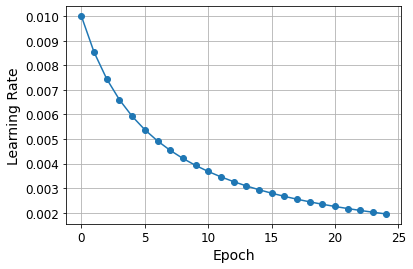

In [20]:
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate_ / (1 + decay_ * epochs * n_steps_per_epoch)

plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.plot(epochs, lrs,  "o-")
plt.grid(True)

plt.show()

**Exponential scheduling**

In [23]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

In [24]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [31]:
n_epochs = 25

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 14s 250us/sample - loss: 1.4784 - accuracy: 0.7035 - val_loss: 1.2069 - val_accuracy: 0.7328
Epoch 2/25
55000/55000 [==============================] - 13s 238us/sample - loss: 1.1297 - accuracy: 0.7542 - val_loss: 1.9001 - val_accuracy: 0.7764
Epoch 3/25
55000/55000 [==============================] - 12s 217us/sample - loss: 1.0237 - accuracy: 0.7773 - val_loss: 1.0849 - val_accuracy: 0.7308
Epoch 4/25
55000/55000 [==============================] - 13s 239us/sample - loss: 0.9149 - accuracy: 0.7940 - val_loss: 1.2414 - val_accuracy: 0.8156
Epoch 5/25
55000/55000 [==============================] - 12s 223us/sample - loss: 0.8952 - accuracy: 0.8077 - val_loss: 1.1373 - val_accuracy: 0.7942
Epoch 6/25
55000/55000 [==============================] - 13s 232us/sample - loss: 0.7724 - accuracy: 0.8241 - val_loss: 1.1432 - val_accuracy: 0.8304
Epoch 7/25
55000/55000 [=====================

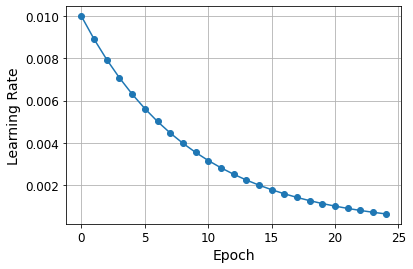

In [32]:
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.plot(history.epoch, history.history["lr"], "o-")
plt.grid(True)

plt.show()

Ниже представлен пример изменения learning_rate на каждом шаге, а не на каждой эпохе, как представлено выше

In [40]:
s = 25 * len(X_train) // 32 #кол-во итераций за 25 эпох
decay_ = 0.1
learning_rate_ = 0.01
exp_sch = keras.optimizers.schedules.ExponentialDecay(learning_rate_, s, decay_)
optimizer = keras.optimizers.SGD(exp_sch)

In [41]:
n_epochs = 25

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 10s 189us/sample - loss: 0.4849 - accuracy: 0.8297 - val_loss: 0.4003 - val_accuracy: 0.8620
Epoch 2/25
55000/55000 [==============================] - 10s 190us/sample - loss: 0.3775 - accuracy: 0.8665 - val_loss: 0.3772 - val_accuracy: 0.8708
Epoch 3/25
55000/55000 [==============================] - 10s 187us/sample - loss: 0.3452 - accuracy: 0.8776 - val_loss: 0.3705 - val_accuracy: 0.8676
Epoch 4/25
55000/55000 [==============================] - 10s 175us/sample - loss: 0.3231 - accuracy: 0.8846 - val_loss: 0.3535 - val_accuracy: 0.8766
Epoch 5/25
55000/55000 [==============================] - 9s 167us/sample - loss: 0.3069 - accuracy: 0.8898 - val_loss: 0.3452 - val_accuracy: 0.8798
Epoch 6/25
55000/55000 [==============================] - 10s 178us/sample - loss: 0.2938 - accuracy: 0.8940 - val_loss: 0.3415 - val_accuracy: 0.8814
Epoch 7/25
55000/55000 [======================

In [87]:
lr_history = np.ones((s,),dtype=np.float32)
for i in range(s):
    lr_history[i] = model.optimizer.learning_rate(i)

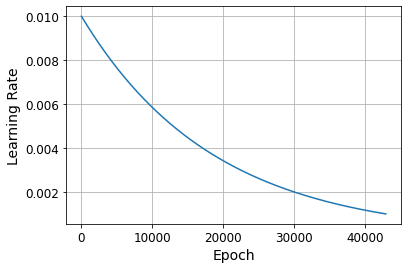

In [90]:
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.plot(range(s), lr_history)
plt.grid(True)

plt.show()

**Piecewise Constant Scheduling**

In [91]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [92]:
n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 16s 292us/sample - loss: 0.8403 - accuracy: 0.7575 - val_loss: 0.6237 - val_accuracy: 0.7946
Epoch 2/25
55000/55000 [==============================] - 15s 278us/sample - loss: 0.8701 - accuracy: 0.7514 - val_loss: 0.7352 - val_accuracy: 0.8078
Epoch 3/25
55000/55000 [==============================] - 15s 277us/sample - loss: 0.9382 - accuracy: 0.7277 - val_loss: 0.8386 - val_accuracy: 0.7364
Epoch 4/25
55000/55000 [==============================] - 15s 278us/sample - loss: 0.9242 - accuracy: 0.7240 - val_loss: 0.9622 - val_accuracy: 0.7088
Epoch 5/25
55000/55000 [==============================] - 15s 274us/sample - loss: 0.8952 - accuracy: 0.7154 - val_loss: 0.9735 - val_accuracy: 0.6742
Epoch 6/25
55000/55000 [==============================] - 16s 287us/sample - loss: 0.6113 - accuracy: 0.7890 - val_loss: 0.7032 - val_accuracy: 0.8164
Epoch 7/25
55000/55000 [=====================

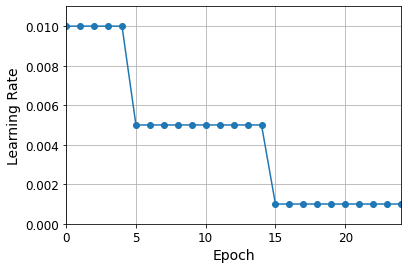

In [94]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()

**Performance Scheduling**

In [95]:
tf.random.set_seed(42)
np.random.seed(42)

In [96]:
n_epochs = 25
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 11s 192us/sample - loss: 0.5889 - accuracy: 0.8074 - val_loss: 0.4865 - val_accuracy: 0.8436
Epoch 2/25
55000/55000 [==============================] - 11s 195us/sample - loss: 0.5163 - accuracy: 0.8366 - val_loss: 0.4585 - val_accuracy: 0.8514
Epoch 3/25
55000/55000 [==============================] - 11s 203us/sample - loss: 0.5024 - accuracy: 0.8431 - val_loss: 0.5680 - val_accuracy: 0.8272
Epoch 4/25
55000/55000 [==============================] - 11s 203us/sample - loss: 0.5105 - accuracy: 0.8479 - val_loss: 0.6766 - val_accuracy: 0.8480
Epoch 5/25
55000/55000 [==============================] - 11s 195us/sample - loss: 0.5081 - accuracy: 0.8530 - val_loss: 0.5886 - val_accuracy: 0.8394
Epoch 6/25
55000/55000 [==============================] - 10s 186us/sample - loss: 0.5079 - accuracy: 0.8531 - val_loss: 0.7926 - val_accuracy: 0.8366
Epoch 7/25
55000/55000 [=====================

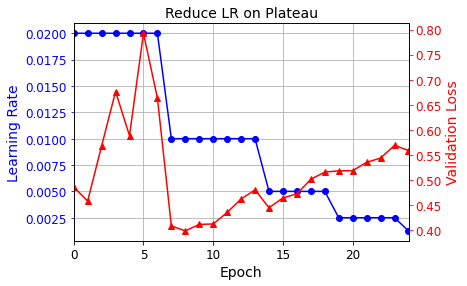

In [99]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()